In [13]:
# Load main packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting handling
import seaborn as sns # plotting handling
import altair as alt # plotting handling
import time # timer

In [14]:
# Load 
data = pd.read_csv('C:/Users/micha/OneDrive/Documents/repos/Soto Instagram test/Instagram_Data.csv')

In [15]:
# Clean/Preprocessing
data['Date Posted'] = pd.to_datetime(data['Date Posted']) # Convert to datetime
data['Type'] = data['Type'].astype('category') # Change to category
data['Day Name'] = data['Date Posted'].dt.strftime("%A") # Get day name
data['Workday'] = data['Day Name'].apply(lambda x: False if x in ['Saturday', 'Sunday'] else True) # Is workday or not

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [17]:
def plot_agg(agg_name="Average", agg_function=np.mean, ci=75):
    palette = ["navy", "teal", "crimson"]
    cols = ['Image', 'Images', 'Video'] 
    STEP = 0.1
    
    # Plot lineplot
    plt.figure(figsize=(20, 9))
    
    for col, pal in zip(cols, palette):
        # Plot Mean - Max
        preframe = data[data["Type"] == col]
        frame = preframe.groupby('Month')['Likes'].apply(agg_function)
        sns.lineplot(data=preframe, x="Month", y="Likes", color=pal, estimator=agg_function, ci=ci, label=col)
        plt.plot(frame.argmax()+1, frame.max(), color=pal, markersize=10, marker='o')
        plt.text(frame.argmax()+1 + STEP, frame.max(), f'MAX({col})={round(frame.max())} | {months[frame.argmax()]}', color=pal, weight='bold')
    
    plt.legend(loc='lower right')
    plt.title(f'{agg_name} number of likes by Month and Type of content ({ci}% confidence interval)')
    plt.show()

In [18]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75):
    STEP = 0.1
    plt.figure(figsize=(20, 8))
    frame = data.groupby('Month')['Likes'].apply(agg_function)
    sns.lineplot(data=data, x="Month", y="Likes", estimator=agg_function, ci=ci, color='#A788B5')
    plt.plot(frame.argmax()+1, frame.max(), color='red', markersize=10, marker='o')
    plt.text(frame.argmax()+1 + STEP, frame.max(), f'MAX()={round(frame.max())} | {months[frame.argmax()]}', color='red', weight='bold')
    plt.plot(frame.argmin()+1, frame.min(), color='blue', markersize=10, marker='o')
    plt.text(frame.argmin()+1 + STEP, frame.min(), f'MIN()={round(frame.min())} | {months[frame.argmin()]}', color='blue', weight='bold')
    plt.title(f"{agg_name} number of likes by Month ({ci}% confidence interval)")
    plt.show()

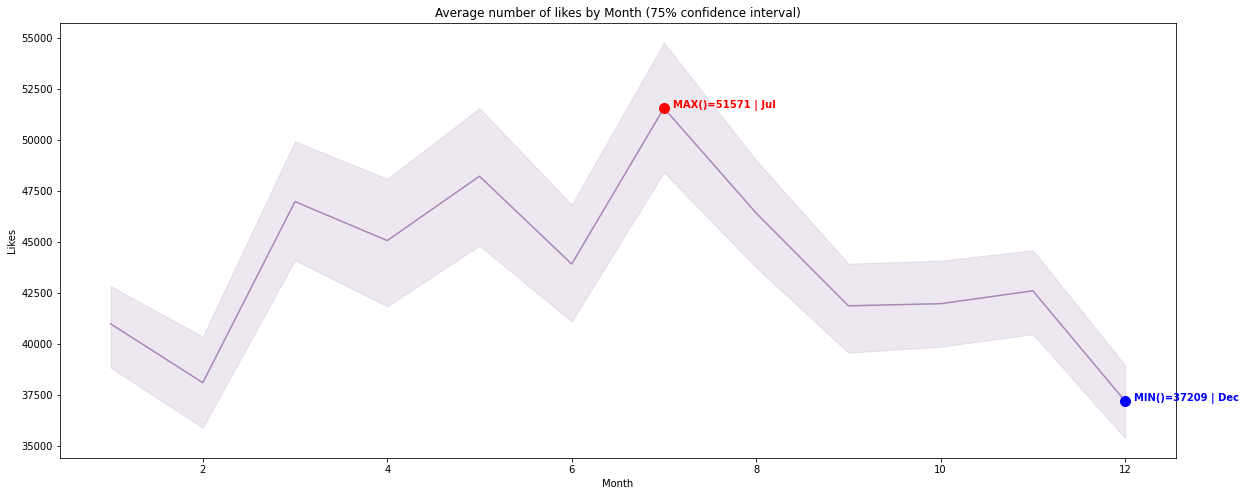

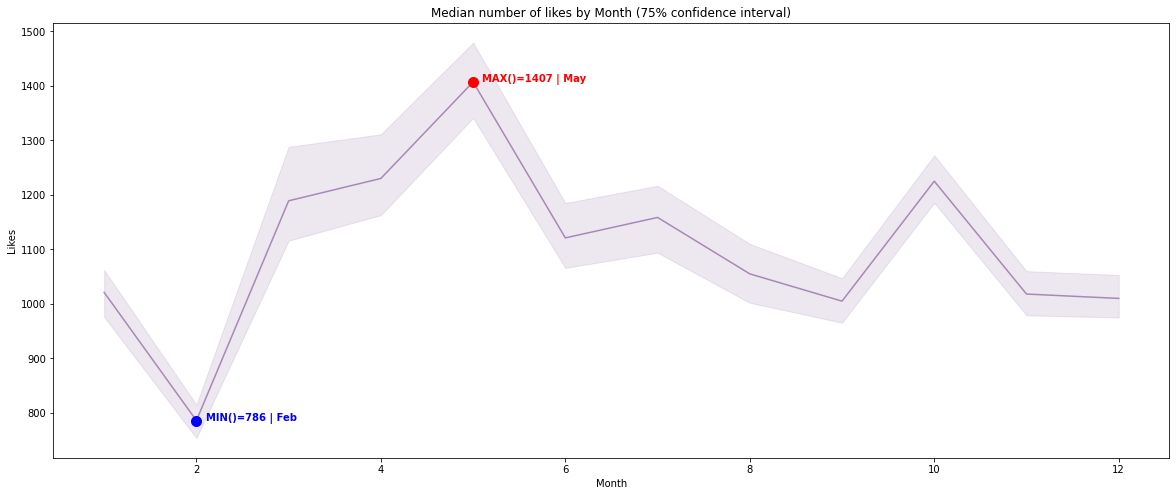

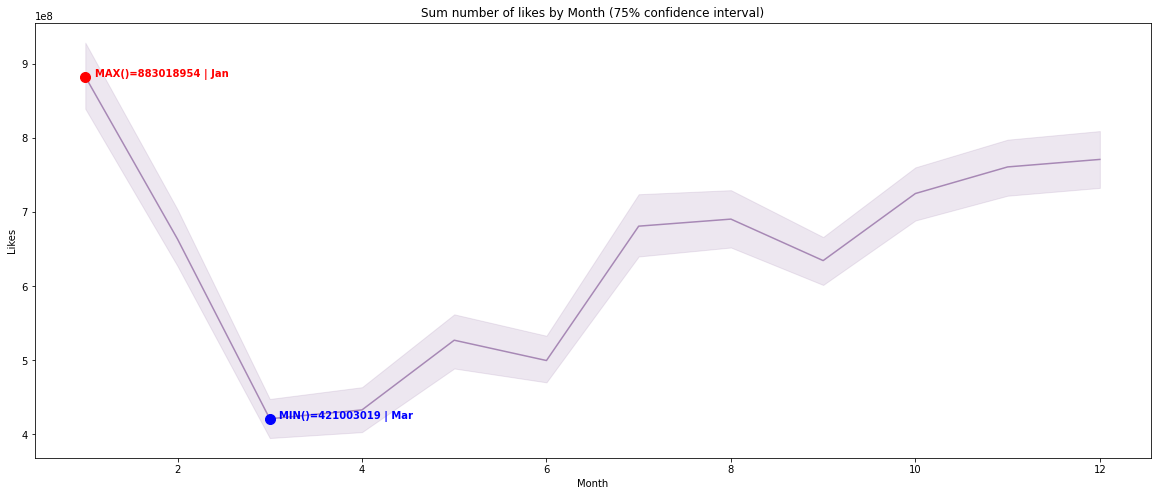

In [19]:
plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)
plot_agg_simple(agg_name="Sum", agg_function=np.sum, ci=75)

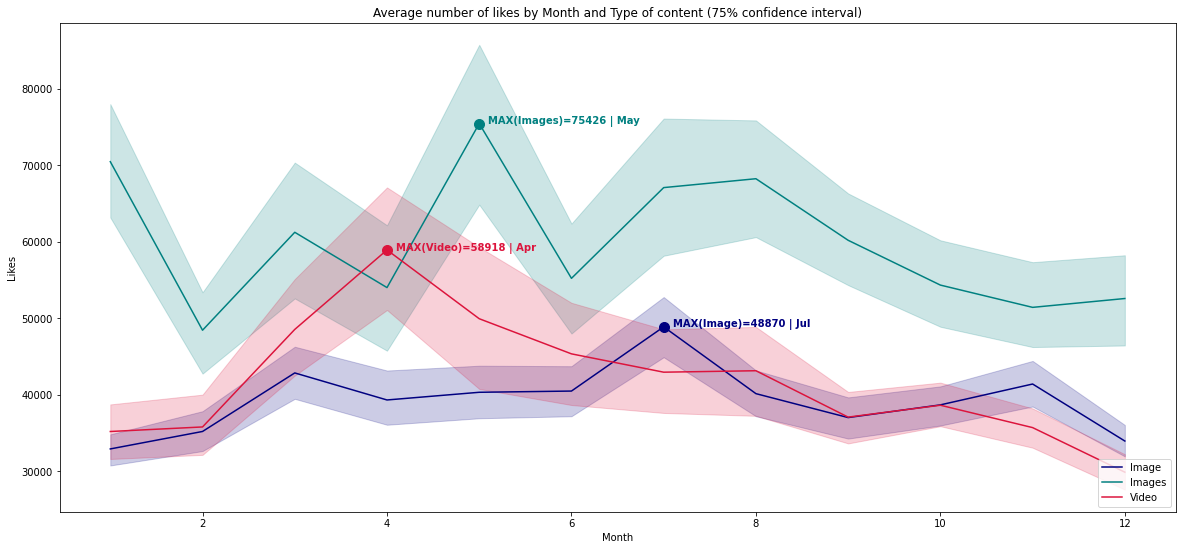

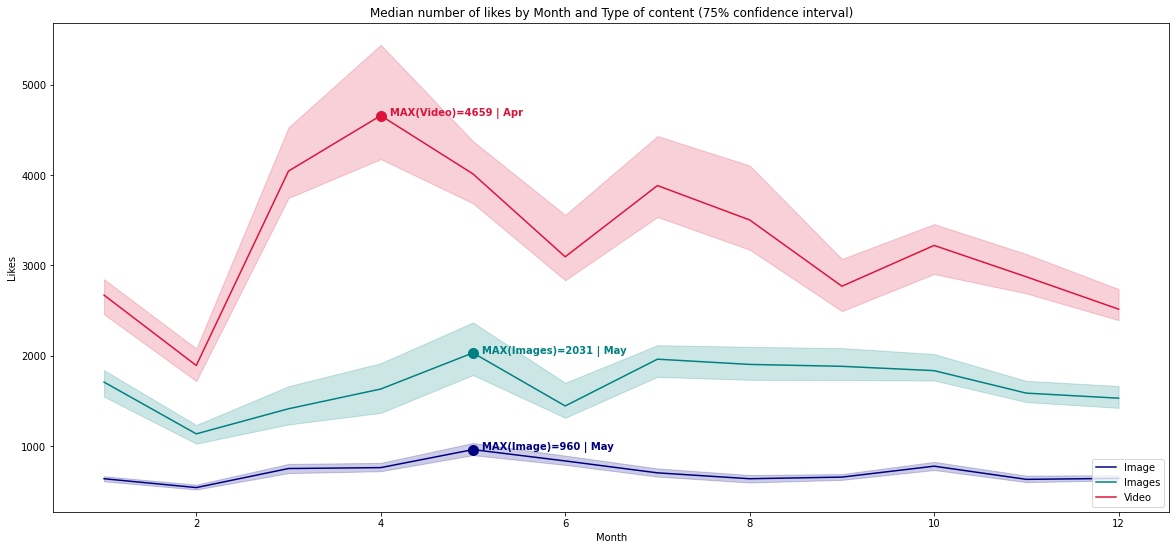

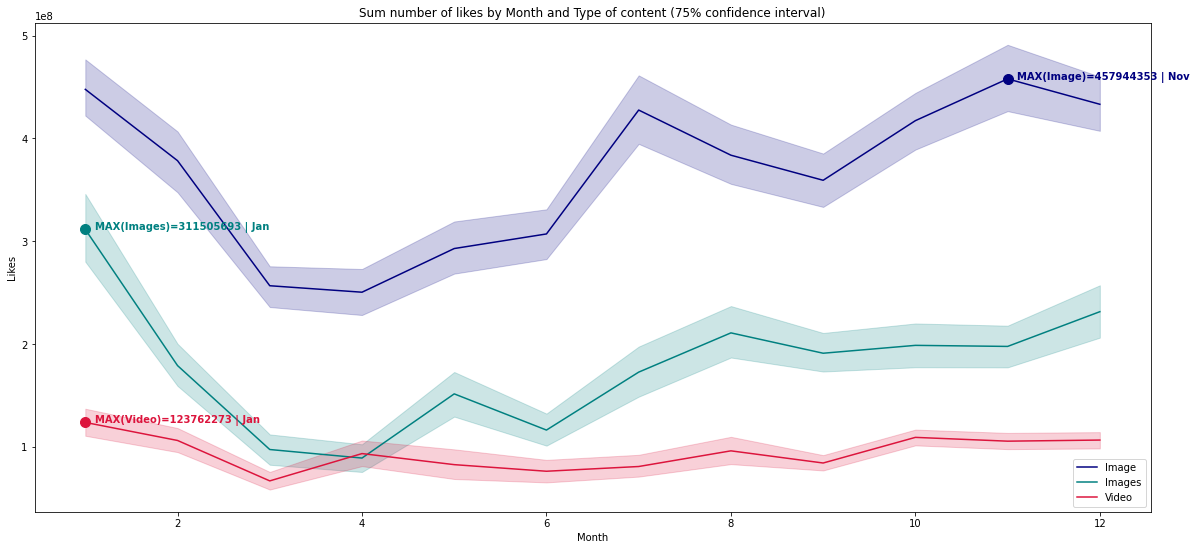

In [20]:
plot_agg(agg_name="Average", agg_function=np.mean)
plot_agg(agg_name="Median", agg_function=np.median)
plot_agg(agg_name="Sum", agg_function=np.sum)